In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
from random import randrange
from torch import sigmoid

In [2]:
#Set the random seed
torch.manual_seed(0)

In [3]:
# train dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
# validation dataset
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validation dataset: \n ", validation_dataset)

Print the validation dataset: 
  Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


Plotting the data function

In [5]:
def show_data(sample):
    plt.imshow(sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(sample[1]))

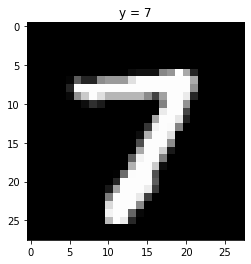

In [6]:
show_data(train_dataset[randrange(len(train_dataset))])
# show_data(train_dataset[60000])

### Class

In [7]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
        self.l1 = None
        self.a1 = None
        self.l2 = None
        
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        return self.l2

In [8]:
input_dim = 28 * 28
output_dim = 10

model = Net(input_dim, input_dim-1, output_dim)

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
loader_train = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=10)
loader_validation = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=len(validation_dataset))

In [17]:
n_epochs=1
loss_list = []
accuracy_list = []
z = None
y_test = None
yhat = None

def train_model(epochs):
    for epoch in range(epochs):
#         print(epoch)
        i = 0
        for x, y in loader_train:
#             print(y.size())
#             print(i)
            i += 1
            yhat = model.forward(x.view(-1, 28*28))
#             print(yhat.size())
            loss = criterion(yhat, y)
#             print(loss)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        loss_list.append(loss.data)    
#         print('loss data: ', loss.data)
#         print('loss list: ', loss_list)
            
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in loader_validation:
            z = model(x_test.view(-1, 28 * 28))
            print(z)  
            _, yhat = torch.max(z.data, 1)
            print(yhat)

            correct += (yhat == y_test).sum().item()
        accuracy = correct / len(validation_dataset)
        accuracy_list.append(accuracy)



# takes quite a lot of time ~10-15 min on my laptop
train_model(n_epochs)   

print(z)      
print(y_test)
print(yhat)

tensor([[ -0.5304,  -6.7121,   3.4205,  ...,  13.2114,   0.3618,   3.7996],
        [  0.9646,   5.1283,  13.8753,  ..., -12.7861,   2.4536, -13.4871],
        [ -8.2984,   9.7406,   1.8973,  ...,  -0.0887,   0.8810,  -1.4529],
        ...,
        [ -6.4682,  -4.8406,  -4.7539,  ...,   1.4928,   2.7249,   5.5640],
        [ -0.0285,  -1.4642,  -4.6952,  ...,  -5.2716,   4.7202,  -4.0309],
        [  2.5013,  -3.4683,   1.2427,  ...,  -7.0052,  -2.9565,  -2.8897]],
       grad_fn=<AddmmBackward>)
tensor([7, 2, 1,  ..., 4, 5, 6])
None
None
None


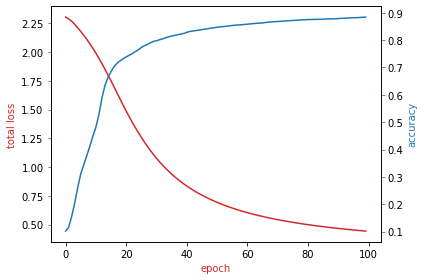

In [10]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()